In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [6]:
# Reading the Data -
df_Zomato = pd.read_csv('zomato.csv')
df_Zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
# Checking "Missing Values" against each Features -
df_Zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [16]:
# "drop" All those Missing Values from 'location' Feature -

df_Zomato.dropna(axis = 'index', subset = ['location'], inplace = True)

In [18]:
# Cross-Checking the Missing Values -
df_Zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7754
votes                              0
phone                           1187
location                           0
rest_type                        206
dish_liked                     28057
cuisines                          24
approx_cost(for two people)      325
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [19]:
#'unique' Values of 'location' Feature -

df_Zomato['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima

In [20]:
# Length of our Unique Locations -
len(df_Zomato['location'].unique())

93

In [21]:
# Data which having/contains "Bangalore" in the given data -
location_with_Bangalore = df_Zomato.loc[df_Zomato['location'].str.contains("Bangalore")]['location']

location_with_Bangalore

355      South Bangalore
629      South Bangalore
830      South Bangalore
1342     South Bangalore
1347     South Bangalore
              ...       
50674     East Bangalore
50818     East Bangalore
51002     East Bangalore
51213     East Bangalore
51234     East Bangalore
Name: location, Length: 179, dtype: object

In [22]:
# Process this data -
def data_preprocessing(data):
    data = data.replace('Bangalore', '').strip()
    return data

In [23]:
location_with_Bangalore.apply(data_preprocessing)

# All this data is processed as per the requirement. Hence, We can apply this same Function to our Original
#'location' Feature/Column to get the desired result.

355      South
629      South
830      South
1342     South
1347     South
         ...  
50674     East
50818     East
51002     East
51213     East
51234     East
Name: location, Length: 179, dtype: object

In [24]:
# Applying Function to our whole/entire Data -
df_Zomato['location (Processed)'] = df_Zomato['location'].apply(data_preprocessing)

In [25]:
# Cross-check What we have got into "location (Processed)" Column/Feature -
df_Zomato['location (Processed)']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location (Processed), Length: 51696, dtype: object

In [26]:
myList = []
for i in df_Zomato['location (Processed)']:
    i = i + ' Bangalore'
    myList.append(i)

In [27]:
myList

['Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Basavanagudi Bangalore',
 'Basavanagudi Bangalore',
 'Mysore Road Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Basavanagudi Bangalore',
 'Basavanagudi Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 'Banashankari Bangalore',
 '

In [28]:
df_Zomato['location (Processed)'] = myList

In [29]:
# Cross-Check:
df_Zomato['location (Processed)']

0                      Banashankari Bangalore
1                      Banashankari Bangalore
2                      Banashankari Bangalore
3                      Banashankari Bangalore
4                      Basavanagudi Bangalore
                         ...                 
51712                    Whitefield Bangalore
51713                    Whitefield Bangalore
51714                    Whitefield Bangalore
51715    ITPL Main Road, Whitefield Bangalore
51716    ITPL Main Road, Whitefield Bangalore
Name: location (Processed), Length: 51696, dtype: object

In [30]:
# "unique" Locations in this "location" Column.

df_Zomato['location (Processed)'].unique()

array(['Banashankari Bangalore', 'Basavanagudi Bangalore',
       'Mysore Road Bangalore', 'Jayanagar Bangalore',
       'Kumaraswamy Layout Bangalore', 'Rajarajeshwari Nagar Bangalore',
       'Vijay Nagar Bangalore', 'Uttarahalli Bangalore',
       'JP Nagar Bangalore', 'South Bangalore', 'City Market Bangalore',
       'Nagarbhavi Bangalore', 'Bannerghatta Road Bangalore',
       'BTM Bangalore', 'Kanakapura Road Bangalore',
       'Bommanahalli Bangalore', 'CV Raman Nagar Bangalore',
       'Electronic City Bangalore', 'HSR Bangalore',
       'Marathahalli Bangalore', 'Sarjapur Road Bangalore',
       'Wilson Garden Bangalore', 'Shanti Nagar Bangalore',
       'Koramangala 5th Block Bangalore',
       'Koramangala 8th Block Bangalore', 'Richmond Road Bangalore',
       'Koramangala 7th Block Bangalore', 'Jalahalli Bangalore',
       'Koramangala 4th Block Bangalore', 'Bellandur Bangalore',
       'Whitefield Bangalore', 'East Bangalore',
       'Old Airport Road Bangalore', 'Indira

In [31]:
# Length of our Unique Locations -
len(df_Zomato['location (Processed)'].unique())

93

In [32]:
# "Geo-graphical" Analysis -

df_locations = pd.DataFrame()
df_locations['Name'] = df_Zomato['location (Processed)'].unique()
df_locations.head()

# "df_locations" DataFrame, We have each and every 'unique' Locations.

,Name
0,Banashankari Bangalore
1,Basavanagudi Bangalore
2,Mysore Road Bangalore
3,Jayanagar Bangalore
4,Kumaraswamy Layout Bangalore


In [33]:
# !uv pip install geopy

In [34]:
#Each and Every 'geolocation' Service has its own Class in 'geographical Python', which is my 'geopy'.
# Set Connection to this "Open Street Map".

import geopy
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = 'myapplications', timeout = None)

In [35]:
# Extract Latitudes and Logitudes for each of the Locations of Bangalore.

Lat = []
Long = []

for location in df_locations['Name']:
    location = geolocator.geocode(location)

    if location is None:
        Lat.append(np.nan)
        Long.append(np.nan)
    else:
        Lat.append(location.latitude)
        Long.append(location.longitude)

In [36]:
# Add these ('Latitude' & 'Longitude') Columns to DataFrame -
df_locations['Latitude'] = Lat
df_locations['Longitude'] = Long

In [37]:
# Check What we've got in our DataFrame -
df_locations.head()

# All the 'latitude' and 'longitude' values are set with respect to each and every location.

,Name,Latitude,Longitude
0,Banashankari Bangalore,12.939333,77.553982
1,Basavanagudi Bangalore,12.941726,77.575502
2,Mysore Road Bangalore,12.956755,77.549380
3,Jayanagar Bangalore,12.939904,77.582638
4,Kumaraswamy Layout Bangalore,12.906768,77.559502


In [38]:
# No. of Locations we have -
df_locations.shape

(93, 3)

In [39]:
# Top Locations -

rest_Locations = df_Zomato['location (Processed)'].value_counts().reset_index()
rest_Locations

,location (Processed),count
0,BTM Bangalore,5124
1,HSR Bangalore,2523
2,Koramangala 5th Block Bangalore,2504
3,JP Nagar Bangalore,2235
4,Whitefield Bangalore,2144
...,...,...
88,Yelahanka Bangalore,6
89,West Bangalore,6
90,Jakkur Bangalore,3
91,Rajarajeshwari Nagar Bangalore,2


In [40]:
# Pre-process this DataFrame -

rest_Locations.columns = ['Name', 'Count']
rest_Locations.head()

,Name,Count
0,BTM Bangalore,5124
1,HSR Bangalore,2523
2,Koramangala 5th Block Bangalore,2504
3,JP Nagar Bangalore,2235
4,Whitefield Bangalore,2144


In [41]:
# 'Combine'/'Merge' both our DataFrame -
    # 1st one is "rest_Locations" and the 2nd one is "df_locations".

Restaurant_Locations = rest_Locations.merge(right = df_locations, on = 'Name', how = 'left').dropna()
Restaurant_Locations

,Name,Count,Latitude,Longitude
0,BTM Bangalore,5124,12.916360,77.604733
1,HSR Bangalore,2523,12.900563,77.649475
2,Koramangala 5th Block Bangalore,2504,12.934843,77.618977
3,JP Nagar Bangalore,2235,12.909694,77.586607
4,Whitefield Bangalore,2144,12.969637,77.749745
...,...,...,...,...
88,Yelahanka Bangalore,6,12.988157,77.622600
89,West Bangalore,6,13.009652,77.553054
90,Jakkur Bangalore,3,13.072457,77.604156
91,Rajarajeshwari Nagar Bangalore,2,12.927441,77.515522


In [42]:
# save Restaurant_Locations DataFrame to CSV file -
Restaurant_Locations.to_csv('Restaurant_Locations.csv', index = False)

# Cross-Check the CSV file -
df_Restaurant_Locations = pd.read_csv('Restaurant_Locations.csv')
df_Restaurant_Locations

,Name,Count,Latitude,Longitude
0,BTM Bangalore,5124,12.916360,77.604733
1,HSR Bangalore,2523,12.900563,77.649475
2,Koramangala 5th Block Bangalore,2504,12.934843,77.618977
3,JP Nagar Bangalore,2235,12.909694,77.586607
4,Whitefield Bangalore,2144,12.969637,77.749745
...,...,...,...,...
86,Yelahanka Bangalore,6,12.988157,77.622600
87,West Bangalore,6,13.009652,77.553054
88,Jakkur Bangalore,3,13.072457,77.604156
89,Rajarajeshwari Nagar Bangalore,2,12.927441,77.515522


## Use Case 1 : Location Heatmap of Restaurants

In [43]:
# Q1. Generate BaseMap of Bangalore. -->

# To Create "Interactive Maps", we need "folium" Library.

!uv pip install folium

Using Python 3.12.9 environment at: /home/VoidArch/College/Labs/GEOTA/Project/.venv
Audited 1 package in 10ms


In [44]:
# 'folium' Library with HeatMap -

import folium
from folium.plugins import HeatMap

In [45]:
# Create a 'BaseMap' -
# Coordinate of Bangalore is [12.928081, 77.630720]

def generateBaseMap(default_location = [12.928081, 77.630720], default_zoom_start = 12):
    baseMap = folium.Map(location = default_location, zoom_start = default_zoom_start)
    return baseMap

In [46]:
baseMap = generateBaseMap()
baseMap

In [47]:
# Q2. Create a HeatMap of Restaurants in Bangalore.

HeatMap(Restaurant_Locations[['Latitude', 'Longitude', 'Count']], zoom = 20).add_to(baseMap)

In [48]:
baseMap

**Conclusion -**

- So, To make an ***inferences*** from this **HeatMap**, it is clear that we have ***very High Density of Restaurants*** in **"South-East" Bangalore** Area. It means ***very High Number of Restaurants*** are there. 
- On the other hand, As we move away from **"Central" Bangalore** region, will figure-out, We have ***Less Number of Restaurants***.

## Use Case 2 :- "Marker Cluster Analysis" on Zomato Dataset -

In [49]:
from folium.plugins import MarkerCluster

In [50]:
# Q3. Create a HeatMap of Restaurants in Bangalore: Marker Cluster Map -->

# Create a marker cluster object
marker_cluster = MarkerCluster().add_to(baseMap)

# Add markers for each location with restaurant count
for idx, row in Restaurant_Locations.iterrows():
	folium.Marker(
		location=[row['Latitude'], row['Longitude']],
		popup=f"{row['Name']}: {row['Count']} restaurants",
		tooltip=row['Name']
	).add_to(marker_cluster)

In [51]:
baseMap

**Conclusion -** Marker Cluster Map
- So, To make an ***inferences*** from this **HeatMap**, it is clear that We have ***very High Clutter/Density of Restaurants*** in **"South-East" Bangalore** Area. It means ***very High Number of Restaurants*** are there. 
- On the other hand, As we move away from **"Central" Bangalore** region, will figure-out, We have ***Less Number of Restaurants***.

## Use Case 3 : "Rating Based Analysis" on Zomato Dataset -

In [52]:
df_Zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),location (Processed)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Banashankari Bangalore
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Banashankari Bangalore
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Banashankari Bangalore
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Banashankari Bangalore
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Basavanagudi Bangalore


In [53]:
# Q4. Now, Let's Analyze where are the Restaurants with Most Average Ratings OR We can say, With High Average Rating?

df_Zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [54]:
df_Zomato.dropna(axis = 'index', subset = ['rate'], inplace = True)

In [55]:
# Cross-check the data -
df_Zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [56]:
def split(x):
    return x.split('/')[0]

In [57]:
df_Zomato['rating'] = df_Zomato['rate'].apply(split)

In [58]:
# Check our DataFrame -
df_Zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),location (Processed),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Banashankari Bangalore,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Banashankari Bangalore,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Banashankari Bangalore,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Banashankari Bangalore,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Basavanagudi Bangalore,3.8


In [59]:
# Check the "Unique" Columns on "rate" Feature.
df_Zomato['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [60]:
df_Zomato['rating'].replace('NEW', 0, inplace=True)
df_Zomato['rating'].replace('-', 0, inplace=True)

In [61]:
# Check the "Unique" Columns on "rate" Feature.
df_Zomato['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [62]:
df_Zomato['rating'].dtype

dtype('O')

In [63]:
df_Zomato['rating'] = pd.to_numeric(df_Zomato['rating'])
df_Zomato['rating']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rating, Length: 43942, dtype: float64

In [64]:
# Fetch each and every 'Location' with "Avg. Rating".

df_Zomato.groupby('location (Processed)')['rating'].mean()

location (Processed)
BTM Bangalore                  3.296128
Banashankari Bangalore         3.373292
Banaswadi Bangalore            3.362926
Bannerghatta Road Bangalore    3.271677
Basavanagudi Bangalore         3.478185
                                 ...   
West Bangalore                 2.020000
Whitefield Bangalore           3.384170
Wilson Garden Bangalore        3.257635
Yelahanka Bangalore            3.640000
Yeshwantpur Bangalore          3.502679
Name: rating, Length: 92, dtype: float64

In [65]:
# 'Sort' this Data based on the "Avg. Rating" -

df_Ratings = df_Zomato.groupby('location (Processed)')['rating'].mean().sort_values(ascending = False).reset_index()
df_Ratings.columns = ['Location', 'Avg_Rating']
df_Ratings

,Location,Avg_Rating
0,Lavelle Road Bangalore,4.042886
1,St. Marks Road Bangalore,4.017201
2,Koramangala 3rd Block Bangalore,3.978756
3,Sankey Road Bangalore,3.965385
4,Church Street Bangalore,3.963091
...,...,...
87,Electronic City Bangalore,3.041909
88,Bommanahalli Bangalore,2.926752
89,Hebbal Bangalore,2.880000
90,North Bangalore,2.385714


In [66]:
# Create a DataFrame -
df_Ratings_Locations = pd.DataFrame({
                            'Name' : df_Ratings['Location']
                        })
df_Ratings_Locations

,Name
0,Lavelle Road Bangalore
1,St. Marks Road Bangalore
2,Koramangala 3rd Block Bangalore
3,Sankey Road Bangalore
4,Church Street Bangalore
...,...
87,Electronic City Bangalore
88,Bommanahalli Bangalore
89,Hebbal Bangalore
90,North Bangalore


In [69]:
# Indentify Latitudes and Logitudes for each of the Locations of Bangalore.
Lat = []
Long = []

for location in df_Ratings_Locations['Name']:
    location = geolocator.geocode(location)

    if location is None:
        Lat.append(np.nan)
        Long.append(np.nan)
    else:
        Lat.append(location.latitude)
        Long.append(location.longitude)

In [70]:
#Just Cross-Checking the Length of the 'latitudes':
print(f'Length of Latitudes: {len(Lat)} & Length of Longitudes: {len(Long)}')

Length of Latitudes: 92 & Length of Longitudes: 92


In [71]:
# Add these ('Latitude' & 'Longitude') Columns to DataFrame -
df_Ratings_Locations['Latitude'] = Lat
df_Ratings_Locations['Longitude'] = Long

In [72]:
# Pre-process & call our DataFrame to see What we've got -
df_Ratings_Locations.rename(columns = {'Name' : 'Location'}, inplace = True)
df_Ratings_Locations

,Location,Latitude,Longitude
0,Lavelle Road Bangalore,12.968340,77.596507
1,St. Marks Road Bangalore,12.975801,77.601692
2,Koramangala 3rd Block Bangalore,12.928292,77.625403
3,Sankey Road Bangalore,12.986584,77.588778
4,Church Street Bangalore,12.974914,77.605247
...,...,...,...
87,Electronic City Bangalore,12.848760,77.648253
88,Bommanahalli Bangalore,12.908945,77.623904
89,Hebbal Bangalore,13.038218,77.591900
90,North Bangalore,12.988157,77.622600


In [73]:
# 'Combine'/'Merge' both our DataFrame -
    # 1st one is "df_Ratings_Locations" and the 2nd one is "df_Ratings".

df_Ratings_Final = df_Ratings_Locations.merge(right = df_Ratings, on = 'Location', how = 'left').dropna()
df_Ratings_Final

,Location,Latitude,Longitude,Avg_Rating
0,Lavelle Road Bangalore,12.968340,77.596507,4.042886
1,St. Marks Road Bangalore,12.975801,77.601692,4.017201
2,Koramangala 3rd Block Bangalore,12.928292,77.625403,3.978756
3,Sankey Road Bangalore,12.986584,77.588778,3.965385
4,Church Street Bangalore,12.974914,77.605247,3.963091
...,...,...,...,...
87,Electronic City Bangalore,12.848760,77.648253,3.041909
88,Bommanahalli Bangalore,12.908945,77.623904,2.926752
89,Hebbal Bangalore,13.038218,77.591900,2.880000
90,North Bangalore,12.988157,77.622600,2.385714


In [74]:
# save Restaurant_Ratings DataFrame to CSV file -
df_Ratings_Final.to_csv('Restaurant_Ratings.csv', index = False)

# Cross-Check the CSV file -
df_Ratings_Final = pd.read_csv('Restaurant_Ratings.csv')
df_Ratings_Final

,Location,Latitude,Longitude,Avg_Rating
0,Lavelle Road Bangalore,12.968340,77.596507,4.042886
1,St. Marks Road Bangalore,12.975801,77.601692,4.017201
2,Koramangala 3rd Block Bangalore,12.928292,77.625403,3.978756
3,Sankey Road Bangalore,12.986584,77.588778,3.965385
4,Church Street Bangalore,12.974914,77.605247,3.963091
...,...,...,...,...
85,Electronic City Bangalore,12.848760,77.648253,3.041909
86,Bommanahalli Bangalore,12.908945,77.623904,2.926752
87,Hebbal Bangalore,13.038218,77.591900,2.880000
88,North Bangalore,12.988157,77.622600,2.385714


In [ ]:
# Q5. Create a HeatMap to Analyse - What are those Restaurants that have "Highest Ratings"?

HeatMap(df_Ratings_Final[['Latitude', 'Longitude', 'Avg_Rating']]).add_to(baseMap)

In [ ]:
baseMap

**Conclusion -**
- This is exactly our ***beautiful 'baseMap'*** over here.
- We will see here in this **"Central Bangalore Area"**, we have **"Highest Density"**.
- It means, in this ***Zone/Region***, We have **"Maximum Number of Restaurants"** that are having **"Highest Ratings"**.
- That's ***How exactly we can 'make inference' from our "Special Visuals"***.

## Use Case 4 : "Cuisine Based Analysis" on Zomato Dataset -

In [75]:
df_Zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),location (Processed),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Banashankari Bangalore,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Banashankari Bangalore,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Banashankari Bangalore,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Banashankari Bangalore,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Basavanagudi Bangalore,3.8


In [76]:
# Q6. HeatMap of North Indian Restaurants.

# Check "unique" cuisines -
df_Zomato['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'],
      shape=(2504,), dtype=object)

In [77]:
# Condition as "cuisines" equal equals to "North Indian".

df_North_Indian_Cuisines = df_Zomato[df_Zomato['cuisines'] == 'North Indian']
df_North_Indian_Cuisines.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),location (Processed),rating
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari,Basavanagudi Bangalore,3.8
50,https://www.zomato.com/bangalore/petoo-banasha...,"276, Ground Floor, 100 Feet Outer Ring Road, B...",Petoo,No,No,3.7/5,21,+91 8026893211,Banashankari,Quick Bites,NaN,North Indian,450,"[('Rated 2.0', 'RATED\n This is a neatly made...",[],Delivery,Banashankari,Banashankari Bangalore,3.7
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NEW,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari,Banashankari Bangalore,0.0
87,https://www.zomato.com/bangalore/krishna-sagar...,"38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...",Krishna Sagar,No,No,3.5/5,31,+91 8892752997\r\n+91 7204780429,Banashankari,Quick Bites,NaN,North Indian,200,"[('Rated 1.0', 'RATED\n Worst experience with...",[],Delivery,Banashankari,Banashankari Bangalore,3.5
94,https://www.zomato.com/bangalore/nandhini-delu...,"304, Opposite Apollo Public School, 100 Feet R...",Nandhini Deluxe,No,No,2.6/5,283,080 26890011\r\n080 26890033,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari,Banashankari Bangalore,2.6


In [78]:
# Locations with Total Number of Restaurants -

df_North_Indian_Cuisines = df_North_Indian_Cuisines.groupby('location (Processed)')['name'].agg('count').reset_index()
df_North_Indian_Cuisines

,location (Processed),name
0,BTM Bangalore,274
1,Banashankari Bangalore,35
2,Banaswadi Bangalore,9
3,Bannerghatta Road Bangalore,60
4,Basavanagudi Bangalore,17
...,...,...
59,"Varthur Main Road, Whitefield Bangalore",3
60,Vasanth Nagar Bangalore,12
61,Whitefield Bangalore,148
62,Wilson Garden Bangalore,37


In [79]:
# "pre-process" and "Sort" this DataFrame as well -
df_North_Indian_Cuisines.columns = ['Name', 'Count']
df_North_Indian_Cuisines.sort_values(by = 'Count', ascending = False, inplace = True)
df_North_Indian_Cuisines

,Name,Count
0,BTM Bangalore,274
61,Whitefield Bangalore,148
24,JP Nagar Bangalore,135
19,HSR Bangalore,131
6,Bellandur Bangalore,131
...,...,...
14,East Bangalore,2
46,RT Nagar Bangalore,2
20,Hennur Bangalore,2
5,Basaveshwara Nagar Bangalore,1


In [80]:
# 'Combine'/'Merge' both my DataFrame -

df_North_Indian_Final = df_North_Indian_Cuisines.merge(right = df_locations, on = 'Name', how = 'left').dropna()
df_North_Indian_Final

,Name,Count,Latitude,Longitude
0,BTM Bangalore,274,12.916360,77.604733
1,Whitefield Bangalore,148,12.969637,77.749745
2,JP Nagar Bangalore,135,12.909694,77.586607
3,HSR Bangalore,131,12.900563,77.649475
4,Bellandur Bangalore,131,12.925352,77.675941
...,...,...,...,...
59,East Bangalore,2,12.988157,77.622600
60,RT Nagar Bangalore,2,13.022720,77.595715
61,Hennur Bangalore,2,13.025809,77.630507
62,Basaveshwara Nagar Bangalore,1,12.991180,77.544892


In [81]:
# Q6. HeatMap of North Indian Restaurants.

HeatMap(df_North_Indian_Final[['Latitude', 'Longitude', 'Count']], zoom = 20).add_to(baseMap)

In [ ]:
baseMap

**Conclusion -** **"HeatMap"** of **"North Indian Restaurants"** in ***Bangalore***.
- From this **HeatMap**, we can come to a ***Conclusion*** that, In **"South-East" Bangalore Region**, We have **"Maximum Number of North Indian Restaurants"**.
- So, We can also **Conclude** that, again in this Zone, We might have a **"Maximum Number of North Indian People"**.

In [82]:
cuisines = []
for i in df_Zomato['cuisines']:
    cuisines.extend(str(i).split(','))

for i in range(len(cuisines)):
    cuisines[i] = cuisines[i].strip()

df_cuisines = pd.DataFrame(cuisines, columns = ['cuisines'])
df_cuisines['cuisines'].unique()

array(['North Indian', 'Mughlai', 'Chinese', 'Thai', 'Cafe', 'Mexican',
       'Italian', 'South Indian', 'Rajasthani', 'Andhra', 'Pizza',
       'Continental', 'Momos', 'Beverages', 'Fast Food', 'American',
       'French', 'European', 'Bakery', 'Burger', 'Desserts', 'Biryani',
       'Street Food', 'Rolls', 'Ice Cream', 'Healthy Food', 'Salad',
       'Asian', 'Korean', 'Indonesian', 'Japanese', 'Goan', 'Seafood',
       'Kebab', 'Steak', 'Mithai', 'Iranian', 'Sandwich', 'Mangalorean',
       'Juices', 'Vietnamese', 'Hyderabadi', 'Bengali', 'Arabian', 'BBQ',
       'Tea', 'Afghani', 'Lebanese', 'Finger Food', 'Tibetan', 'nan',
       'Charcoal Chicken', 'Middle Eastern', 'Mediterranean', 'Wraps',
       'Kerala', 'Oriya', 'Bihari', 'Roast Chicken', 'Maharashtrian',
       'Bohri', 'African', 'Nepalese', 'Turkish', 'Tamil', 'Tex-Mex',
       'Belgian', 'Gujarati', 'South American', 'Konkan', 'Chettinad',
       'Coffee', 'Indian', 'Afghan', 'Modern Indian', 'Lucknowi',
       'Austral

In [83]:
cuisine_counts = {}

for cuisines in df_Zomato['cuisines']:
    if isinstance(cuisines, str):
        cuisine_list = [cuisine.strip() for cuisine in cuisines.split(',')]
        for cuisine in cuisine_list:
            if cuisine in cuisine_counts:
                cuisine_counts[cuisine] += 1
            else:
                cuisine_counts[cuisine] = 1

# Create a dataframe from the dictionary
cuisine_df = pd.DataFrame({
    'cuisine': list(cuisine_counts.keys()),
    'restaurant_count': list(cuisine_counts.values())
})

# Sort by restaurant count in descending order
cuisine_df = cuisine_df.sort_values(by='restaurant_count', ascending=False)

cuisine_df = cuisine_df.reset_index(drop=True)

print(f"Total unique cuisines found: {len(cuisine_df)}")
cuisine_df.head(15)

Total unique cuisines found: 106


,cuisine,restaurant_count
0,North Indian,18421
1,Chinese,13694
2,South Indian,6933
3,Fast Food,6807
4,Continental,5507
5,Biryani,5380
6,Cafe,5009
7,Desserts,4768
8,Beverages,4110
9,Italian,3305


#### List of Top Cuisines (Based on Number of Restaurants Offering them) -

* North Indian
* Chinese
* South Indian
* Fast Food
* Continental
* Biryani
* Cafe
* Desserts
* Beverages
* Italian
* Street Food
* Bakery
* Pizza
* Burger
* Seafood

In [84]:
def HeatMap_Zone(zone):
    df_Zone = df_Zomato[df_Zomato['cuisines'] == zone]
    df_Zone = df_Zone.groupby('location (Processed)')['name'].agg('count').reset_index()
    df_Zone.columns = ['Name', 'Count']
    df_Zone.sort_values(by = 'Count', ascending = False, inplace = True)
    df_Zone = df_Zone.merge(right = df_locations, on = 'Name', how = 'left').dropna()
    HeatMap(df_Zone[['Latitude', 'Longitude', 'Count']], zoom = 20).add_to(baseMap)
    return baseMap

In [85]:
# Check "unique" cuisines -
df_Zomato['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'],
      shape=(2504,), dtype=object)

In [86]:
# Q7. HeatMap of "South Indian" cuisines Restaurants.

HeatMap_Zone('South Indian')

**Conclusion -** **"HeatMap"** of **"South Indian Restaurants"** in ***Bangalore***.
- From this **HeatMap**, we can come to a ***Conclusion*** that, In **"South-West" Bangalore Region**, We have **"Maximum Number of "South Indian Restaurants"** followed by **"Central"** and **"South-East" Bangalore**.
- So, We can also **Conclude** that, again in this Zone, We might have a **"Maximum Number of South Indian People"**.
- So, that's a basically a Conclusion of this Visualization or a **HeatMap**.

In [ ]:
# Q8. HeatMap of "Biryani" cuisines Restaurants.

HeatMap_Zone('Biryani')

baseMap

**Conclusion -** **"HeatMap"** of **"Biryani" cuisines Restaurants"** in ***Bangalore***.
- From this **HeatMap**, we can come to a ***Conclusion*** that, In **"South" Bangalore Region**, We have **"Maximum Number of "Biryani cuisines Restaurants"** followed by **"South-West"** and **"Central" Bangalore**.
- So, that's a basically a Conclusion of this Visualization or a **HeatMap**.

### Perform this Analysis on Top 15 Cuisines -

In [87]:
import os
from folium.plugins import HeatMap, MarkerCluster

In [88]:
os.makedirs('cuisines', exist_ok=True)

# List of cuisines to analyze
# cuisines_list = [
#     "North Indian", "Chinese", "South Indian", "Fast Food", "Biryani", "Continental", "Desserts", "Cafe", "Beverages", "Italian", "Bakery", "Street Food", "Pizza", "Burger", "Seafood", "Ice Cream", "Andhra", "Mughlai", "Rolls", "American", "Kerala", "Asian", "Momos", "Finger Food", "Juices", "Salad", "Arabian", "Kebab", "Mithai", "Thai", "Healthy Food", "Sandwich", "BBQ", "European", "Mangalorean", "Bengali", "Steak", "Mediterranean", "Mexican", "Tea", "Tibetan", "Japanese", "Hyderabadi", "Chettinad", "Rajasthani", "Lebanese", "Vietnamese", "Modern Indian", "Korean", "Maharashtrian", "Coffee", "Oriya", "Goan", "Malaysian", "Middle Eastern", "Gujarati", "Indonesian", "Turkish", "Bihari", "Charcoal Chicken", "French", "Nepalese", "Konkan", "Afghan", "North Eastern", "Wraps", "Burmese", "Lucknowi", "Tex-Mex", "Singaporean", "Sushi", "Spanish", "Bar Food", "Greek", "Kashmiri", "Iranian", "Awadhi", "Parsi", "Assamese", "Naga", "Grill", "Roast Chicken", "South American", "African", "Sri Lankan", "Paan", "Mongolian", "Portuguese", "Drinks Only", "Bubble Tea", "Afghani", "British", "German", "Tamil", "Bohri", "Vegan", "Russian", "Jewish", "Cantonese", "Australian", "Belgian", "Raw Meats", "Sindhi", "Pan Asian", "Hot dogs", "Indian", "Malwani",
# ]
cuisines_list = ['North Indian', 'Chinese', 'South Indian', 'Fast Food', 'Continental', 'Biryani', 'Cafe', 'Desserts', 'Beverages', 'Italian', 'Street Food', 'Bakery', 'Pizza', 'Burger', 'Seafood']

# Dictionary to store maps for each cuisine
cuisine_maps = {}

# Process each cuisine
for cuisine in cuisines_list:
    # Filter for specific cuisine
    df_cuisine = df_Zomato[df_Zomato['cuisines'] == cuisine]

    # Group by location and count restaurants
    df_cuisine_count = df_cuisine.groupby('location (Processed)')['name'].agg('count').reset_index()

    # Rename columns and sort
    df_cuisine_count.columns = ['Name', 'Count']
    df_cuisine_count.sort_values(by='Count', ascending=False, inplace=True)

    # Merge with locations dataframe
    df_final = df_cuisine_count.merge(right=df_locations, on='Name', how='left').dropna()

    # Save as CSV
    csv_path = f'cuisines/{cuisine.replace(" ", "_")}_restaurants.csv'
    df_final.to_csv(csv_path, index=False)
    print(f"Saved {cuisine} data to {csv_path}")

    # Create a new base map for this cuisine
    cuisine_map = folium.Map(location=[12.9716, 77.5946], zoom_start=11, control_scale=True)

    # Add heatmap
    HeatMap(df_final[['Latitude', 'Longitude', 'Count']], zoom=20).add_to(cuisine_map)

    # Add marker clusters
    marker_cluster = MarkerCluster().add_to(cuisine_map)

    # Add markers for each location
    for idx, row in df_final.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['Name']}: {row['Count']} {cuisine} restaurants",
            tooltip=row['Name']
        ).add_to(marker_cluster)

    # Save the map for later display
    cuisine_maps[cuisine] = cuisine_map

    # Display the map
    # display(cuisine_map)

Saved North Indian data to cuisines/North_Indian_restaurants.csv
Saved Chinese data to cuisines/Chinese_restaurants.csv
Saved South Indian data to cuisines/South_Indian_restaurants.csv
Saved Fast Food data to cuisines/Fast_Food_restaurants.csv
Saved Biryani data to cuisines/Biryani_restaurants.csv
Saved Continental data to cuisines/Continental_restaurants.csv
Saved Desserts data to cuisines/Desserts_restaurants.csv
Saved Cafe data to cuisines/Cafe_restaurants.csv
Saved Beverages data to cuisines/Beverages_restaurants.csv
Saved Italian data to cuisines/Italian_restaurants.csv
Saved Bakery data to cuisines/Bakery_restaurants.csv
Saved Street Food data to cuisines/Street_Food_restaurants.csv
Saved Pizza data to cuisines/Pizza_restaurants.csv
Saved Burger data to cuisines/Burger_restaurants.csv
Saved Seafood data to cuisines/Seafood_restaurants.csv
Saved Ice Cream data to cuisines/Ice_Cream_restaurants.csv
Saved Andhra data to cuisines/Andhra_restaurants.csv
Saved Mughlai data to cuisines/

In [89]:
cuisine_maps['North Indian']

### Preprocess for Regions

In [90]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster
from geopy.geocoders import Nominatim
import os
import time
import warnings
warnings.filterwarnings('ignore')

In [91]:
def preprocess_zomato_data(df):
    """
    Comprehensive preprocessing function for Zomato data

    Parameters:
    - df: The original Zomato dataframe

    Returns:
    - Preprocessed dataframe
    """
    # Copy the dataframe to avoid modifying the original
    df = df.copy()

    print("Starting preprocessing...")
    print(f"Original shape: {df.shape}")

    # Drop missing values from location
    df.dropna(axis='index', subset=['location'], inplace=True)
    print(f"After dropping missing locations: {df.shape}")

    # Location processing
    df['location (Processed)'] = df['location'].apply(lambda x: x.replace('Bangalore', '').strip())

    # Create full location name
    df['location (Full)'] = df['location (Processed)'] + ' Bangalore'

    # Process rating
    # Drop missing ratings first
    df.dropna(axis='index', subset=['rate'], inplace=True)
    print(f"After dropping missing ratings: {df.shape}")

    # Extract numeric rating
    df['rating'] = df['rate'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else x)

    # Replace non-numeric ratings
    df['rating'] = df['rating'].replace('NEW', '0')
    df['rating'] = df['rating'].replace('-', '0')

    # Convert to numeric
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

    # Clean cost data
    df['approx_cost'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

    # Process cuisines
    df['cuisines'] = df['cuisines'].fillna('')

    # Process votes - convert to numeric
    df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
    df['votes'] = df['votes'].fillna(0).astype(int)

    # Remove any rows that now have invalid ratings
    df = df[df['rating'].notna()]
    print(f"Final shape after preprocessing: {df.shape}")

    return df

In [92]:
df_zomato = pd.read_csv('zomato.csv')
print("Original data sample:")
df_zomato.head()

Original data sample:


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [93]:
# Apply preprocessing
df_preprocessed = preprocess_zomato_data(df_zomato)

# Check the preprocessed data
print("\nPreprocessed data sample:")
df_preprocessed.head()

# Examine changes
print("\nNew columns added:")
new_columns = set(df_preprocessed.columns) - set(df_zomato.columns)
print(new_columns)

# Check for missing values in preprocessed data
print("\nMissing values in preprocessed data:")
df_preprocessed.isnull().sum()

Starting preprocessing...
Original shape: (51717, 17)
After dropping missing locations: (51696, 17)
After dropping missing ratings: (43942, 19)
Final shape after preprocessing: (43942, 21)

Preprocessed data sample:

New columns added:
{'location (Processed)', 'rating', 'location (Full)', 'approx_cost'}

Missing values in preprocessed data:


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                           0
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
location (Processed)               0
location (Full)                    0
rating                             0
approx_cost                     7050
dtype: int64

In [94]:
def add_geolocation_data(df):
    """
    Add geolocation data (latitude and longitude) to the dataset

    Parameters:
    - df: Preprocessed Zomato dataframe

    Returns:
    - DataFrame with added geolocation data and locations DataFrame
    """
    print("Starting geolocation process...")

    # Copy the dataframe to avoid modifying the original
    df = df.copy()

    # Initialize geocoder
    geolocator = Nominatim(user_agent="restaurant_recommender")

    # Get unique locations to avoid redundant API calls
    unique_locations = df['location (Full)'].unique()

    print(f"Found {len(unique_locations)} unique locations to geocode")

    # Create a DataFrame of unique locations
    locations_df = pd.DataFrame({'location_name': unique_locations})

    # Initialize coordinate columns
    locations_df['latitude'] = None
    locations_df['longitude'] = None

    # Geocode each unique location
    print("Geocoding locations (this may take some time)...")

    for idx, location in enumerate(unique_locations):
        try:
            # Use geocoder to get coordinates
            geocode_result = geolocator.geocode(location, timeout=30)

            if geocode_result:
                locations_df.loc[locations_df['location_name'] == location, 'latitude'] = geocode_result.latitude
                locations_df.loc[locations_df['location_name'] == location, 'longitude'] = geocode_result.longitude
            else:
                print(f"Could not geocode location: {location}")

            # Add a small delay to avoid hitting API rate limits
            time.sleep(1)

            # Progress update
            if (idx + 1) % 10 == 0:
                print(f"Processed {idx + 1}/{len(unique_locations)} locations")

        except Exception as e:
            print(f"Error geocoding {location}: {str(e)}")

    # Count successful geocodes
    geocoded_count = locations_df.dropna().shape[0]
    print(f"Successfully geocoded {geocoded_count} out of {len(unique_locations)} locations")

    # Create a mapping dictionary from location to coordinates
    location_to_coords = dict(zip(
        locations_df['location_name'],
        zip(locations_df['latitude'], locations_df['longitude'])
    ))

    # Add coordinates to the main dataframe
    print("Adding coordinates to main dataframe...")

    df['latitude'] = df['location (Full)'].map(lambda x: location_to_coords.get(x, (None, None))[0])
    df['longitude'] = df['location (Full)'].map(lambda x: location_to_coords.get(x, (None, None))[1])

    # Remove restaurants with missing coordinates
    original_count = df.shape[0]
    df = df.dropna(subset=['latitude', 'longitude'])
    final_count = df.shape[0]

    print(f"Removed {original_count - final_count} restaurants with missing coordinates")
    print(f"Final dataset has {final_count} restaurants with valid coordinates")

    # Save geocoded locations for future use
    locations_df.dropna(inplace=True)

    return df, locations_df

In [95]:
# Apply the geolocation function to our preprocessed data
df_with_geo, locations = add_geolocation_data(df_preprocessed)

# Check the data with geolocation
print("\nPreprocessed data with geolocation sample:")
df_with_geo.head()

# Check locations dataframe
print("\nLocations data sample:")
locations.head()

# Save the processed data for future use
df_with_geo.to_csv('zomato_processed_with_geo.csv', index=False)
locations.to_csv('zomato_locations.csv', index=False)

print("\nSaved processed data to 'zomato_processed_with_geo.csv'")
print("Saved locations data to 'zomato_locations.csv'")

Starting geolocation process...


Found 92 unique locations to geocode
Geocoding locations (this may take some time)...
Processed 10/92 locations
Processed 20/92 locations
Processed 30/92 locations
Processed 40/92 locations
Processed 50/92 locations
Processed 60/92 locations
Processed 70/92 locations
Could not geocode location: Rammurthy Nagar Bangalore
Processed 80/92 locations
Could not geocode location: Sadashiv Nagar Bangalore
Processed 90/92 locations
Successfully geocoded 90 out of 92 locations
Adding coordinates to main dataframe...
Removed 86 restaurants with missing coordinates
Final dataset has 43856 restaurants with valid coordinates

Preprocessed data with geolocation sample:

Locations data sample:

Saved processed data to 'zomato_processed_with_geo.csv'
Saved locations data to 'zomato_locations.csv'


In [96]:
def create_region_datasets(df):
    """
    Split the data into separate CSV files by region

    Parameters:
    - df: Preprocessed Zomato dataframe with geolocation data

    Returns:
    - Dictionary mapping regions to their file paths
    """
    print("Creating region-based datasets...")

    # Create directory for region files if it doesn't exist
    os.makedirs('regions', exist_ok=True)

    # Get unique regions
    unique_regions = df['location (Processed)'].unique()
    print(f"Found {len(unique_regions)} unique regions")

    # Dictionary to store file paths
    region_files = {}

    # Create a file for each region
    for region in unique_regions:
        if pd.isna(region) or region == '':
            continue

        # Filter data for this region
        region_data = df[df['location (Processed)'] == region]

        # Skip if no data
        if region_data.empty:
            continue

        # Create filename (replace spaces with underscores)
        safe_region_name = region.replace(' ', '_').replace('/', '_').replace('\\', '_')
        filename = f"regions/{safe_region_name}_restaurants.csv"

        # Save to CSV
        region_data.to_csv(filename, index=False)

        # Add to dictionary
        region_files[region] = filename

        print(f"Created file for {region} with {len(region_data)} restaurants: {filename}")

    print(f"\nCreated {len(region_files)} region-based dataset files")

    # Create a metadata file with region information
    region_metadata = pd.DataFrame({
        'region': list(region_files.keys()),
        'file_path': list(region_files.values()),
        'restaurant_count': [len(df[df['location (Processed)'] == region]) for region in region_files.keys()]
    })

    # Add geolocation information to metadata
    region_metadata['latitude'] = region_metadata['region'].apply(
        lambda r: df[df['location (Processed)'] == r]['latitude'].mean()
    )
    region_metadata['longitude'] = region_metadata['region'].apply(
        lambda r: df[df['location (Processed)'] == r]['longitude'].mean()
    )

    # Save metadata
    region_metadata.to_csv('regions/region_metadata.csv', index=False)
    print("Created region metadata file: regions/region_metadata.csv")

    return region_files, region_metadata

Creating region-based datasets...
Found 90 unique regions
Created file for Banashankari with 805 restaurants: regions/Banashankari_restaurants.csv
Created file for Basavanagudi with 628 restaurants: regions/Basavanagudi_restaurants.csv
Created file for Mysore Road with 18 restaurants: regions/Mysore_Road_restaurants.csv
Created file for Jayanagar with 1718 restaurants: regions/Jayanagar_restaurants.csv
Created file for Kumaraswamy Layout with 168 restaurants: regions/Kumaraswamy_Layout_restaurants.csv
Created file for Rajarajeshwari Nagar with 2 restaurants: regions/Rajarajeshwari_Nagar_restaurants.csv
Created file for Vijay Nagar with 71 restaurants: regions/Vijay_Nagar_restaurants.csv
Created file for Uttarahalli with 9 restaurants: regions/Uttarahalli_restaurants.csv
Created file for JP Nagar with 1849 restaurants: regions/JP_Nagar_restaurants.csv
Created file for South with 91 restaurants: regions/South_restaurants.csv
Created file for City Market with 78 restaurants: regions/City_

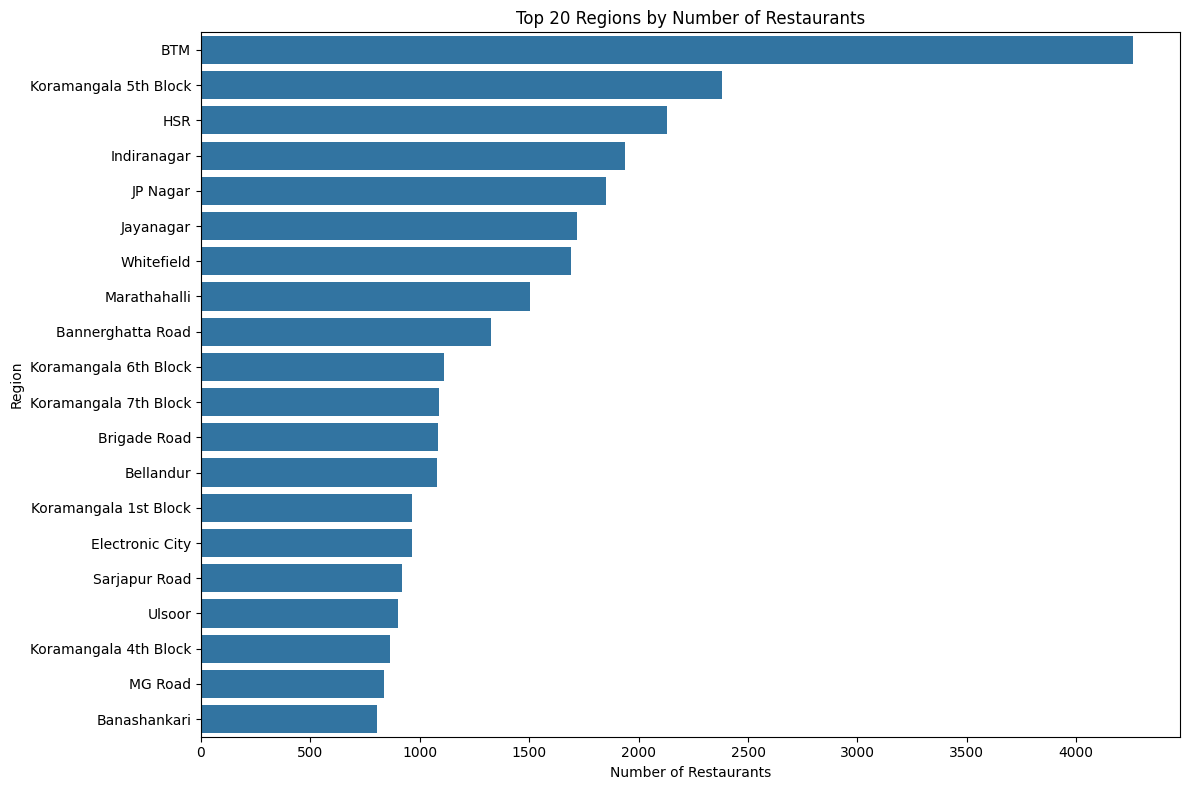

Total regions: 90
Total restaurants: 43856
Average restaurants per region: 487.3
Median restaurants per region: 198.0
Maximum restaurants in a region: 4261 (BTM)
Minimum restaurants in a region: 1 (Nagarbhavi)


In [97]:
# Create region-based datasets
region_files, region_metadata = create_region_datasets(df_with_geo)

# Display the metadata
print("\nRegion metadata sample:")
region_metadata.head()

# Function to analyze the distribution of restaurants across regions
def analyze_region_distribution(metadata):
    """
    Analyze and visualize the distribution of restaurants across regions

    Parameters:
    - metadata: Region metadata DataFrame
    """
    # Sort by restaurant count
    sorted_regions = metadata.sort_values('restaurant_count', ascending=False)

    # Top 20 regions by restaurant count
    top_regions = sorted_regions.head(20)

    # Create a bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='restaurant_count', y='region', data=top_regions)
    plt.title('Top 20 Regions by Number of Restaurants')
    plt.xlabel('Number of Restaurants')
    plt.ylabel('Region')
    plt.tight_layout()
    plt.show()

    # Statistics
    print(f"Total regions: {len(metadata)}")
    print(f"Total restaurants: {metadata['restaurant_count'].sum()}")
    print(f"Average restaurants per region: {metadata['restaurant_count'].mean():.1f}")
    print(f"Median restaurants per region: {metadata['restaurant_count'].median():.1f}")
    print(f"Maximum restaurants in a region: {metadata['restaurant_count'].max()} ({metadata.loc[metadata['restaurant_count'].idxmax(), 'region']})")
    print(f"Minimum restaurants in a region: {metadata['restaurant_count'].min()} ({metadata.loc[metadata['restaurant_count'].idxmin(), 'region']})")

# Analyze region distribution
analyze_region_distribution(region_metadata)

# Create a map to visualize restaurant density across regions
def create_region_density_map(region_metadata):
    """
    Create a map showing restaurant density across regions

    Parameters:
    - region_metadata: Region metadata DataFrame

    Returns:
    - Folium map object
    """
    # Create a base map centered on Bangalore
    m = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

    # Add a circle for each region, with size based on restaurant count
    for idx, row in region_metadata.iterrows():
        if pd.notna(row['latitude']) and pd.notna(row['longitude']):
            # Scale the radius based on restaurant count (min 100, max 1000 meters)
            radius = min(1000, max(100, row['restaurant_count'] * 20))

            # Add a circle
            folium.Circle(
                location=[row['latitude'], row['longitude']],
                popup=f"{row['region']}: {row['restaurant_count']} restaurants",
                radius=radius,
                color='blue',
                fill=True,
                fill_opacity=0.4
            ).add_to(m)

    return m

# Create and display the region density map
region_map = create_region_density_map(region_metadata)
region_map

In [120]:
def create_region_datasets_with_noise(df):
    """
    Split the data into separate CSV files by region and add realistic randomized coordinates
    for each restaurant while keeping them within the region area.

    Parameters:
    - df: Preprocessed Zomato dataframe with geolocation data

    Returns:
    - Dictionary mapping regions to their file paths
    - DataFrame with region metadata
    """
    print("Creating region-based datasets with realistic randomized restaurant coordinates...")

    # Create directory for region files if it doesn't exist
    os.makedirs('new_regions', exist_ok=True)

    # Get unique regions
    unique_regions = df['location (Processed)'].unique()
    print(f"Found {len(unique_regions)} unique regions")

    # Dictionary to store file paths
    region_files = {}

    # For storing region metadata
    region_metadata_list = []

    # Process each region
    for region in unique_regions:
        if pd.isna(region) or region == '':
            continue

        # Filter data for this region
        region_data = df[df['location (Processed)'] == region].copy()

        # Skip if no data
        if region_data.empty:
            continue

        # Get region's central coordinates
        region_lat = region_data['latitude'].mean()
        region_lon = region_data['longitude'].mean()

        # Calculate region boundary approximation
        # Increased spread for more natural distribution (4x larger)
        restaurant_count = len(region_data)

        # Base spread values (much larger than before)
        base_lat_spread = 0.010
        base_lon_spread = 0.010

        # Scale spread based on restaurant density - more restaurants means larger area coverage
        density_factor = min(2.0, max(0.7, np.log10(restaurant_count) / 2))
        lat_spread = base_lat_spread * density_factor
        lon_spread = base_lon_spread * density_factor

        print(f"Region {region}: Using spread of {lat_spread:.5f}° (~{lat_spread*111:.2f}km)")

        # Generate better random coordinates using a mix of distributions
        np.random.seed(42 + hash(region) % 1000)  # Deterministic but different for each region

        # Use combination of distributions for more natural scatter

        # Method 1: Some restaurants clustered near center with normal distribution
        center_ratio = 0.4  # 40% of restaurants near center
        center_count = int(restaurant_count * center_ratio)
        if center_count > 0:
            # Tighter spread for center cluster
            center_lat_offsets = np.random.normal(0, lat_spread/3, center_count)
            center_lon_offsets = np.random.normal(0, lon_spread/3, center_count)
        else:
            center_lat_offsets = np.array([])
            center_lon_offsets = np.array([])

        # Method 2: Some in a ring around center (popular roads, etc)
        ring_ratio = 0.3  # 30% in a ring pattern
        ring_count = int(restaurant_count * ring_ratio)
        if ring_count > 0:
            # Generate points in a ring-like distribution
            ring_radius = np.random.uniform(0.4*lat_spread, 0.8*lat_spread, ring_count)
            ring_angles = np.random.uniform(0, 2*np.pi, ring_count)
            ring_lat_offsets = ring_radius * np.cos(ring_angles)
            ring_lon_offsets = ring_radius * np.sin(ring_angles)
        else:
            ring_lat_offsets = np.array([])
            ring_lon_offsets = np.array([])

        # Method 3: The rest scattered more randomly throughout the area
        scatter_count = restaurant_count - center_count - ring_count
        if scatter_count > 0:
            scatter_lat_offsets = np.random.uniform(-lat_spread, lat_spread, scatter_count)
            scatter_lon_offsets = np.random.uniform(-lon_spread, lon_spread, scatter_count)
        else:
            scatter_lat_offsets = np.array([])
            scatter_lon_offsets = np.array([])

        # Combine all offsets
        lat_offsets = np.concatenate([center_lat_offsets, ring_lat_offsets, scatter_lat_offsets])
        lon_offsets = np.concatenate([center_lon_offsets, ring_lon_offsets, scatter_lon_offsets])

        # Shuffle to randomize which restaurants get which distribution pattern
        shuffle_idx = np.random.permutation(restaurant_count)
        lat_offsets = lat_offsets[shuffle_idx]
        lon_offsets = lon_offsets[shuffle_idx]

        # Apply the offsets to create unique coordinates for each restaurant
        region_data['latitude'] = region_lat + lat_offsets
        region_data['longitude'] = region_lon + lon_offsets

        # Create filename (replace spaces with underscores and other problematic characters)
        safe_region_name = region.replace(' ', '_').replace('/', '_').replace('\\', '_')
        filename = f"new_regions/{safe_region_name}_restaurants.csv"

        # Save to CSV - maintaining all original columns
        region_data.to_csv(filename, index=False)

        # Add to dictionary
        region_files[region] = filename

        # Add to region metadata
        region_metadata_list.append({
            'region': region,
            'file_path': filename,
            'restaurant_count': len(region_data),
            'center_latitude': region_lat,
            'center_longitude': region_lon,
            'min_latitude': region_data['latitude'].min(),
            'max_latitude': region_data['latitude'].max(),
            'min_longitude': region_data['longitude'].min(),
            'max_longitude': region_data['longitude'].max(),
            'spread_km': lat_spread * 111  # approximate km (1 degree ~ 111km)
        })

        print(f"Created file for {region} with {len(region_data)} restaurants: {filename}")

    print(f"\nCreated {len(region_files)} region-based dataset files with randomized coordinates")

    # Create a metadata file with region information
    region_metadata = pd.DataFrame(region_metadata_list)

    # Make sure we only include the original metadata columns to match previous format
    final_metadata = pd.DataFrame({
        'region': region_metadata['region'],
        'file_path': region_metadata['file_path'],
        'restaurant_count': region_metadata['restaurant_count'],
        'latitude': region_metadata['center_latitude'],
        'longitude': region_metadata['center_longitude']
    })

    # Save metadata
    final_metadata.to_csv('new_regions/region_metadata.csv', index=False)
    print("Created region metadata file: new_regions/region_metadata.csv")

    # Also save the detailed metadata with spread information (for validation if needed)
    region_metadata.to_csv('new_regions/region_metadata_detailed.csv', index=False)
    print("Created detailed region metadata file: new_regions/region_metadata_detailed.csv")

    return region_files, final_metadata

In [121]:
# Create region-based datasets with randomized coordinates
region_files, region_metadata = create_region_datasets_with_noise(df_with_geo)

# Display the metadata
print("\nRegion metadata sample:")
region_metadata.head()

Creating region-based datasets with realistic randomized restaurant coordinates...
Found 90 unique regions
Region Banashankari: Using spread of 0.01453° (~1.61km)
Created file for Banashankari with 805 restaurants: new_regions/Banashankari_restaurants.csv
Region Basavanagudi: Using spread of 0.01399° (~1.55km)
Created file for Basavanagudi with 628 restaurants: new_regions/Basavanagudi_restaurants.csv
Region Mysore Road: Using spread of 0.00700° (~0.78km)
Created file for Mysore Road with 18 restaurants: new_regions/Mysore_Road_restaurants.csv
Region Jayanagar: Using spread of 0.01618° (~1.80km)
Created file for Jayanagar with 1718 restaurants: new_regions/Jayanagar_restaurants.csv
Region Kumaraswamy Layout: Using spread of 0.01113° (~1.24km)
Created file for Kumaraswamy Layout with 168 restaurants: new_regions/Kumaraswamy_Layout_restaurants.csv
Region Rajarajeshwari Nagar: Using spread of 0.00700° (~0.78km)
Created file for Rajarajeshwari Nagar with 2 restaurants: new_regions/Rajaraje

,region,file_path,restaurant_count,latitude,longitude
0,Banashankari,new_regions/Banashankari_restaurants.csv,805,12.939333,77.553982
1,Basavanagudi,new_regions/Basavanagudi_restaurants.csv,628,12.941726,77.575502
2,Mysore Road,new_regions/Mysore_Road_restaurants.csv,18,12.953669,77.542505
3,Jayanagar,new_regions/Jayanagar_restaurants.csv,1718,12.939904,77.582638
4,Kumaraswamy Layout,new_regions/Kumaraswamy_Layout_restaurants.csv,168,12.906768,77.559502


In [124]:
import pandas as pd
import os
import glob

def clean_duplicates_in_regions():
    # Path to regions folder
    regions_path = "regions"

    # Check if directory exists
    if not os.path.exists(regions_path):
        print(f"Error: Directory '{regions_path}' not found")
        return

    # Get all CSV files in the regions folder
    csv_files = glob.glob(os.path.join(regions_path, "*.csv"))

    if not csv_files:
        print(f"No CSV files found in {regions_path}")
        return

    print(f"Found {len(csv_files)} CSV files")

    # Process each CSV file
    for csv_file in csv_files:
        try:
            # Get filename for printing
            filename = os.path.basename(csv_file)
            print(f"\nProcessing {filename}...")

            # Read CSV file
            df = pd.read_csv(csv_file)

            # Record original number of rows
            original_rows = len(df)

            # Remove duplicates based on name and url columns only
            df_cleaned = df.drop_duplicates(subset=['name', 'phone'])

            # Record number of rows after removing duplicates
            cleaned_rows = len(df_cleaned)

            # Calculate number of duplicates removed
            duplicates_removed = original_rows - cleaned_rows

            # Save back to the same file
            df_cleaned.to_csv(csv_file, index=False)

            print(f"- Original rows: {original_rows}")
            print(f"- Rows after cleaning: {cleaned_rows}")
            print(f"- Duplicates removed: {duplicates_removed}")

        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")
            continue

    print("\nProcessing complete!")

# Run the function
clean_duplicates_in_regions()

Found 92 CSV files

Processing ITPL_Main_Road,_Whitefield_restaurants.csv...
- Original rows: 84
- Rows after cleaning: 43
- Duplicates removed: 41

Processing Wilson_Garden_restaurants.csv...
- Original rows: 203
- Rows after cleaning: 63
- Duplicates removed: 140

Processing Koramangala_7th_Block_restaurants.csv...
- Original rows: 1089
- Rows after cleaning: 266
- Duplicates removed: 823

Processing Shanti_Nagar_restaurants.csv...
- Original rows: 390
- Rows after cleaning: 101
- Duplicates removed: 289

Processing Brookefield_restaurants.csv...
- Original rows: 581
- Rows after cleaning: 246
- Duplicates removed: 335

Processing West_restaurants.csv...
- Original rows: 5
- Rows after cleaning: 3
- Duplicates removed: 2

Processing Langford_Town_restaurants.csv...
- Original rows: 27
- Rows after cleaning: 3
- Duplicates removed: 24

Processing Ulsoor_restaurants.csv...
- Original rows: 901
- Rows after cleaning: 186
- Duplicates removed: 715

Processing Koramangala_1st_Block_restau

### Recommendation System

In [98]:
import pandas as pd
import numpy as np
import folium
from math import radians
from sklearn.metrics.pairwise import haversine_distances


In [99]:
def recommend_restaurants(user_lat, user_lon, cuisine_preference=None, min_rating=3.5,
                         min_votes=50, max_distance=5, top_n=5, df=None):
    """
    Recommend restaurants based on user preferences

    Parameters:
    - user_lat: User's latitude
    - user_lon: User's longitude
    - cuisine_preference: Preferred cuisine type (optional)
    - min_rating: Minimum rating threshold
    - min_votes: Minimum number of votes threshold
    - max_distance: Maximum distance in kilometers
    - top_n: Number of recommendations to return
    - df: Dataframe with restaurant data (if None, loads the processed data)

    Returns:
    - DataFrame with recommended restaurants
    """
    print(f"Finding restaurants near ({user_lat}, {user_lon})...")

    # Load data if not provided
    if df is None:
        try:
            print("Loading processed data...")
            df = pd.read_csv('zomato_processed_with_geo.csv')
            print(f"Loaded data with {df.shape[0]} restaurants")
        except FileNotFoundError:
            print("Error: Processed data file not found!")
            return pd.DataFrame()

    # Make a copy to avoid modifying the original
    working_df = df.copy()

    # Filter restaurants with valid coordinates
    working_df = working_df.dropna(subset=['latitude', 'longitude'])
    print(f"Found {working_df.shape[0]} restaurants with valid coordinates")

    # Filter by minimum rating and votes
    filtered_df = working_df[(working_df['rating'] >= min_rating) &
                     (working_df['votes'] >= min_votes)]
    print(f"After rating/votes filter: {filtered_df.shape[0]} restaurants")

    # Filter by cuisine if specified
    if cuisine_preference:
        # Handle multiple cuisine preferences (comma-separated)
        if isinstance(cuisine_preference, str) and ',' in cuisine_preference:
            cuisine_list = [c.strip() for c in cuisine_preference.split(',')]
            cuisine_mask = filtered_df['cuisines'].str.contains('|'.join(cuisine_list), case=False, na=False)
            filtered_df = filtered_df[cuisine_mask]
        else:
            filtered_df = filtered_df[filtered_df['cuisines'].str.contains(cuisine_preference, case=False, na=False)]
        print(f"After cuisine filter: {filtered_df.shape[0]} restaurants")

    if filtered_df.empty:
        print("No restaurants match the criteria! Relaxing constraints...")
        # Try with more relaxed criteria
        filtered_df = working_df[(working_df['rating'] >= min_rating - 0.5) &
                       (working_df['votes'] >= min_votes // 2)]
        print(f"After relaxed rating/votes filter: {filtered_df.shape[0]} restaurants")

        if cuisine_preference and not filtered_df.empty:
            if isinstance(cuisine_preference, str) and ',' in cuisine_preference:
                cuisine_list = [c.strip() for c in cuisine_preference.split(',')]
                cuisine_mask = filtered_df['cuisines'].str.contains('|'.join(cuisine_list), case=False, na=False)
                filtered_df = filtered_df[cuisine_mask]
            else:
                filtered_df = filtered_df[filtered_df['cuisines'].str.contains(cuisine_preference, case=False, na=False)]
            print(f"After relaxed cuisine filter: {filtered_df.shape[0]} restaurants")

    if filtered_df.empty:
        print("No restaurants match even the relaxed criteria!")
        return pd.DataFrame()

    # Calculate distance from user location
    user_coords = np.array([[radians(user_lat), radians(user_lon)]])

    # Convert restaurant coordinates to radians
    rest_coords = np.array([[radians(lat), radians(lon)]
                          for lat, lon in zip(filtered_df['latitude'], filtered_df['longitude'])])

    # Calculate distances
    distances = haversine_distances(user_coords, rest_coords) * 6371  # Earth radius in km
    filtered_df['distance_km'] = distances.flatten()

    # Filter by maximum distance
    distance_filtered = filtered_df[filtered_df['distance_km'] <= max_distance]
    print(f"After distance filter: {distance_filtered.shape[0]} restaurants within {max_distance}km")

    if distance_filtered.empty:
        print(f"No restaurants within {max_distance}km. Trying with increased distance...")
        distance_filtered = filtered_df[filtered_df['distance_km'] <= max_distance * 1.5]
        print(f"After increased distance filter: {distance_filtered.shape[0]} restaurants within {max_distance * 1.5}km")

        if distance_filtered.empty:
            print("No restaurants within reasonable distance!")
            return pd.DataFrame()

    # Create a weighted score for ranking
    max_votes = distance_filtered['votes'].max()
    max_distance_value = distance_filtered['distance_km'].max()

    distance_filtered['score'] = (
        distance_filtered['rating'] / 5 * 0.5 +  # 50% weight for rating
        distance_filtered['votes'] / max(1, max_votes) * 0.3 +  # 30% weight for popularity
        (1 - distance_filtered['distance_km'] / max(1, max_distance_value)) * 0.2  # 20% weight for proximity
    )

    # Ensure we're not getting duplicate restaurants
    # Create a unique identifier based on name and location
    distance_filtered['unique_id'] = distance_filtered['name'] + '_' + distance_filtered['latitude'].astype(str) + '_' + distance_filtered['longitude'].astype(str)

    # Get top N recommendations with unique restaurants
    unique_filtered = distance_filtered.drop_duplicates(subset=['unique_id'])
    recommendations = unique_filtered.sort_values(by='score', ascending=False).head(top_n)

    # Select and reorder columns for display
    result = recommendations[[
        'name', 'address', 'cuisines', 'rating', 'votes',
        'approx_cost', 'latitude', 'longitude', 'distance_km', 'score'
    ]]

    print(f"Found {len(result)} unique recommendations!")

    return result

In [100]:
# Test the recommendation system
test_user_lat = 12.9716  # Example: Bangalore city center
test_user_lon = 77.5946
test_cuisine = "North Indian"  # Example cuisine preference

recommendations = recommend_restaurants(
    user_lat=test_user_lat,
    user_lon=test_user_lon,
    cuisine_preference=test_cuisine,
    min_rating=4.0,
    min_votes=100,
    max_distance=5,
    top_n=5
)

print("\nTop 5 Recommendations:")
recommendations

Finding restaurants near (12.9716, 77.5946)...
Loading processed data...
Loaded data with 43856 restaurants
Found 43856 restaurants with valid coordinates
After rating/votes filter: 10887 restaurants
After cuisine filter: 3947 restaurants
After distance filter: 2044 restaurants within 5km
Found 5 unique recommendations!

Top 5 Recommendations:


,name,address,cuisines,rating,votes,approx_cost,latitude,longitude,distance_km,score
4559,Church Street Social,"46/1, Cobalt Building, Church Street, Bangalore","American, North Indian, Chinese, Finger Food, ...",4.3,7544,NaN,12.975700,77.602083,0.930225,0.807277
7094,The Black Pearl,"105, 1st A Cross Road, Jyothi Nivas College Ro...","North Indian, European, Mediterranean",4.7,10413,NaN,12.934843,77.618977,4.866548,0.771258
4411,Hammered,"18, Ali Askar Road, Cunningham Road, Bangalore","North Indian, Thai, Japanese, Continental, Cafe",4.7,4639,NaN,12.985726,77.596041,1.578452,0.738717
4476,Soda Bottle Opener Wala,"25/4, Opposite Harley Davidson Showroom, Lavel...","Parsi, North Indian",4.4,3651,NaN,12.968340,77.596507,0.417228,0.727115
4761,Chutney Chang,"HM Eleganza, 31, Museum Road, Off MG Road, Chu...","North Indian, Chinese, BBQ",4.2,4732,NaN,12.975700,77.602083,0.930225,0.717315


In [101]:
def visualize_recommendations_on_map(recommendations, user_lat, user_lon):
    """
    Create a map showing recommended restaurants and user location

    Parameters:
    - recommendations: DataFrame with restaurant recommendations
    - user_lat, user_lon: User's coordinates

    Returns:
    - Folium Map object
    """
    if recommendations.empty:
        print("No recommendations to visualize")
        return None

    # Create map centered on user location
    rec_map = folium.Map(location=[user_lat, user_lon], zoom_start=13)

    # Add marker for user location
    folium.Marker(
        [user_lat, user_lon],
        popup="Your Location",
        icon=folium.Icon(color="blue", icon="user", prefix="fa")
    ).add_to(rec_map)

    # Add markers for recommended restaurants
    for idx, rest in recommendations.iterrows():
        # Create popup content with restaurant details
        popup_content = f"""
        <b>{rest['name']}</b><br>
        Rating: {rest['rating']}/5 ({rest['votes']} votes)<br>
        Cuisines: {rest['cuisines']}<br>
        Cost: ₹{rest['approx_cost']} for two<br>
        Distance: {rest['distance_km']:.2f} km
        """

        # Add marker
        folium.Marker(
            [rest['latitude'], rest['longitude']],
            popup=folium.Popup(popup_content, max_width=300),
            tooltip=rest['name'],
            icon=folium.Icon(color="red", icon="cutlery", prefix="fa")
        ).add_to(rec_map)

        # Draw a line from user to restaurant
        folium.PolyLine(
            [[user_lat, user_lon], [rest['latitude'], rest['longitude']]],
            color="green",
            weight=2,
            opacity=0.7,
            dash_array="5"
        ).add_to(rec_map)

    return rec_map

In [102]:
recommendation_map = visualize_recommendations_on_map(
    recommendations,
    test_user_lat,
    test_user_lon
)

recommendation_map

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import AntPath
from math import radians
from sklearn.metrics.pairwise import haversine_distances
import warnings
warnings.filterwarnings('ignore')

In [104]:
def generate_route_with_api(user_lat, user_lon, restaurant_lat, restaurant_lon, restaurant_name):
    """
    Generate a route using OSRM API with fallback to direct route
    """
    import requests
    from polyline import decode

    # Create base map
    center_lat = (user_lat + restaurant_lat) / 2
    center_lon = (user_lon + restaurant_lon) / 2
    route_map = folium.Map(location=[center_lat, center_lon], zoom_start=14)

    # Add markers for user location and restaurant
    folium.Marker(
        [user_lat, user_lon],
        popup='Your Location',
        icon=folium.Icon(color='blue', icon='user', prefix='fa')
    ).add_to(route_map)

    folium.Marker(
        [restaurant_lat, restaurant_lon],
        popup=restaurant_name,
        icon=folium.Icon(color='red', icon='cutlery', prefix='fa')
    ).add_to(route_map)

    # Try OSRM API first
    try:
        print("Attempting to get route from OSRM API...")
        url = f"http://router.project-osrm.org/route/v1/driving/{user_lon},{user_lat};{restaurant_lon},{restaurant_lat}?overview=full&geometries=polyline"
        response = requests.get(url, timeout=5)

        if response.status_code == 200:
            route_data = response.json()

            if route_data['code'] == 'Ok' and len(route_data['routes']) > 0:
                # Extract route geometry (in encoded polyline format)
                geometry = route_data['routes'][0]['geometry']

                # Decode the polyline
                route_coords = decode(geometry)

                # Extract route information
                distance = route_data['routes'][0]['distance'] / 1000  # Convert to km
                duration = route_data['routes'][0]['duration'] / 60  # Convert to minutes

                # Add route to map
                folium.PolyLine(
                    locations=route_coords,
                    color='green',
                    weight=5,
                    opacity=0.7,
                    popup=f"Distance: {distance:.2f} km, Duration: {duration:.1f} min"
                ).add_to(route_map)

                # Add info box
                info_html = f"""
                <div style="padding: 10px; background-color: white; border-radius: 5px; box-shadow: 0 0 10px rgba(0,0,0,0.1);">
                    <h4>Route Information</h4>
                    <b>Restaurant:</b> {restaurant_name}<br>
                    <b>Distance:</b> {distance:.2f} km<br>
                    <b>Est. travel time:</b> {duration:.1f} min<br>
                    <i>(Based on actual road network from OSRM)</i>
                </div>
                """

                folium.Marker(
                    [user_lat, user_lon],
                    popup=folium.Popup(info_html, max_width=300),
                    icon=folium.DivIcon(html="")  # Invisible marker, just for the popup
                ).add_to(route_map)

                print("Successfully generated route using OSRM API")
                return route_map
    except Exception as e:
        print(f"OSRM API error: {str(e)}")

    print("Falling back to direct route...")

    # Calculate direct distance using Haversine formula
    user_coords = np.array([[radians(user_lat), radians(user_lon)]])
    rest_coords = np.array([[radians(restaurant_lat), radians(restaurant_lon)]])
    direct_distance_km = haversine_distances(user_coords, rest_coords)[0][0] * 6371

    # Draw direct line
    folium.PolyLine(
        locations=[[user_lat, user_lon], [restaurant_lat, restaurant_lon]],
        color='red',
        weight=5,
        opacity=0.7,
        popup=f"Direct distance: {direct_distance_km:.2f} km",
        dash_array="10,10"  # Dashed line to indicate it's not a real route
    ).add_to(route_map)

    # Add estimated time (assuming 20 km/h in urban traffic)
    estimated_time_min = direct_distance_km / 20 * 60

    # Add warning box about direct route
    info_html = f"""
    <div style="padding: 10px; background-color: white; border-radius: 5px; box-shadow: 0 0 10px rgba(0,0,0,0.1); border-left: 4px solid orange;">
        <h4>⚠️ Direct Route Only</h4>
        <b>Restaurant:</b> {restaurant_name}<br>
        <b>Direct distance:</b> {direct_distance_km:.2f} km<br>
        <b>Est. travel time:</b> {estimated_time_min:.1f} min<br>
        <i>Note: This is a straight-line distance, not following roads.<br>
        Actual travel distance and time will be longer.</i>
    </div>
    """

    folium.Marker(
        [user_lat, user_lon],
        popup=folium.Popup(info_html, max_width=300),
        icon=folium.DivIcon(html="")  # Invisible marker, just for the popup
    ).add_to(route_map)

    return route_map

In [105]:
# Import required libraries if not already imported
import pandas as pd
import numpy as np
import folium
from math import radians
from sklearn.metrics.pairwise import haversine_distances
import requests
import polyline
import warnings
warnings.filterwarnings('ignore')

# Add the function definition for generate_route_with_api here...

# Test the improved navigation
def test_improved_navigation(recommendations, user_lat, user_lon, restaurant_idx=0):
    """
    Test improved navigation to a specific restaurant
    """
    if recommendations is None or recommendations.empty:
        print("No recommendations available")
        return None

    if restaurant_idx >= len(recommendations):
        print(f"Invalid restaurant index. Must be between 0 and {len(recommendations)-1}")
        return None

    # Get selected restaurant
    selected = recommendations.iloc[restaurant_idx]
    print(f"\nNavigating to: {selected['name']}")
    print(f"Address: {selected['address']}")
    print(f"Cuisines: {selected['cuisines']}")
    print(f"Rating: {selected['rating']}/5 ({selected['votes']} votes)")
    print(f"Cost for two: ₹{selected['approx_cost']}")
    print(f"Distance: {selected['distance_km']:.2f} km")

    # Generate improved route
    route_map = generate_route_with_api(
        user_lat=user_lat,
        user_lon=user_lon,
        restaurant_lat=selected['latitude'],
        restaurant_lon=selected['longitude'],
        restaurant_name=selected['name']
    )

    return route_map

# Test with our existing recommendations
if 'recommendations' in globals() and not recommendations.empty:
    user_lat = 12.9716  # Bangalore city center
    user_lon = 77.5946

    route_map = test_improved_navigation(recommendations, user_lat, user_lon, restaurant_idx=2)
    display(route_map)
else:
    print("No recommendations available. Run the recommendation function first.")


Navigating to: Hammered
Address: 18, Ali Askar Road, Cunningham Road, Bangalore
Cuisines: North Indian, Thai, Japanese, Continental, Cafe
Rating: 4.7/5 (4639 votes)
Cost for two: ₹nan
Distance: 1.58 km
Attempting to get route from OSRM API...
Successfully generated route using OSRM API
